Saving Maritime Port Performance Project Dataset.csv to Maritime Port Performance Project Dataset (4).csv
The median delay is 1.07 days.
HighDelay
0    502
1    301
Name: count, dtype: int64
HighDelay
0    62.515567
1    37.484433
Name: proportion, dtype: float64


/tmp/ipython-input-7-1844084785.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="HighDelay", palette = "pastel")


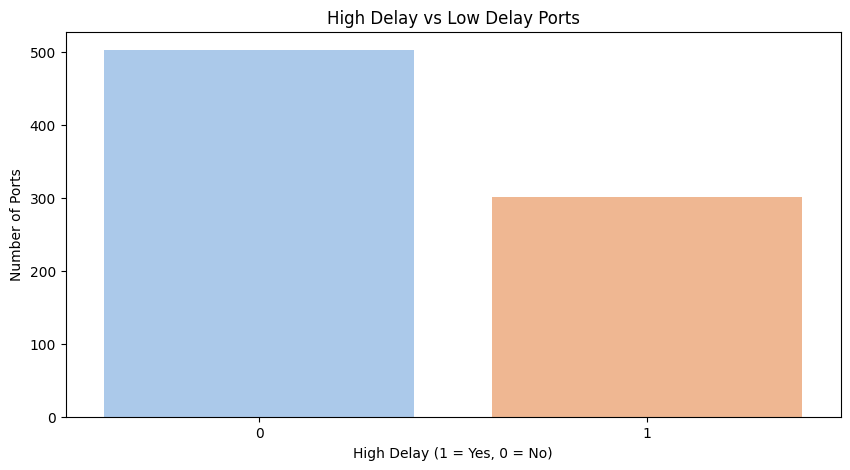

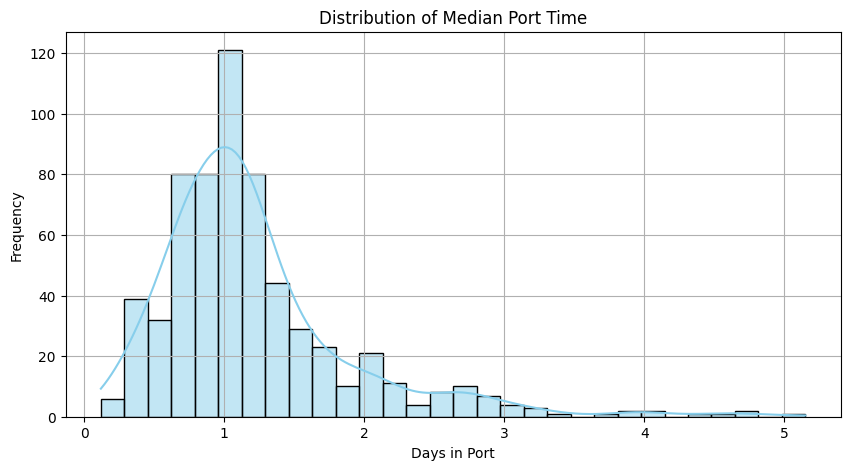

/tmp/ipython-input-7-1844084785.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="CommercialMarket_Label", y="Median_time_in_port_days_Value", palette="coolwarm")


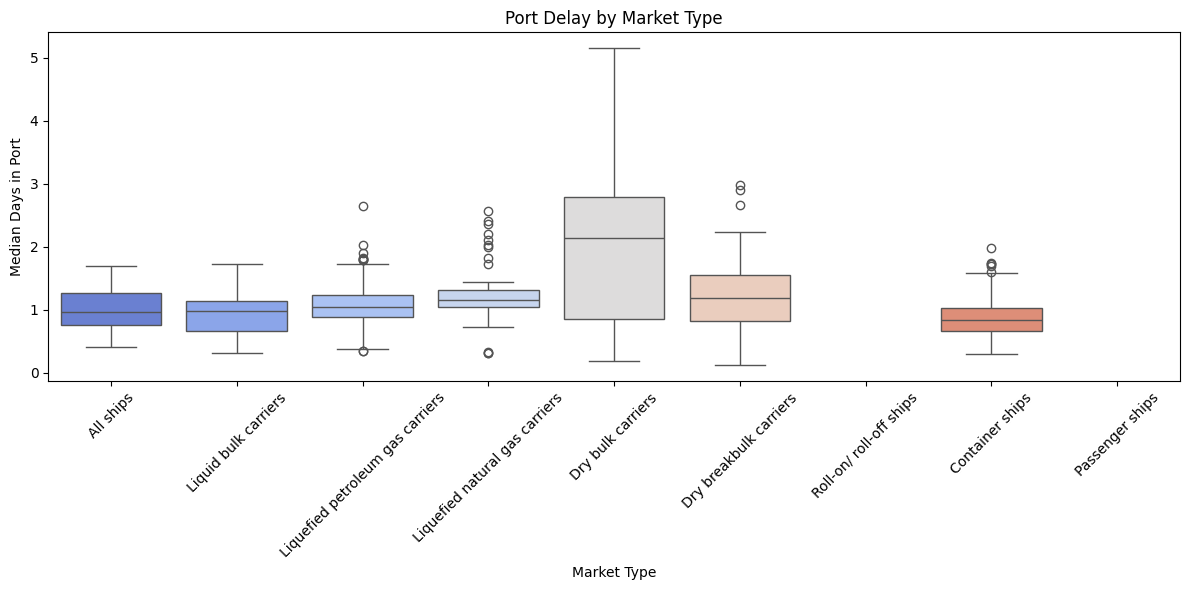

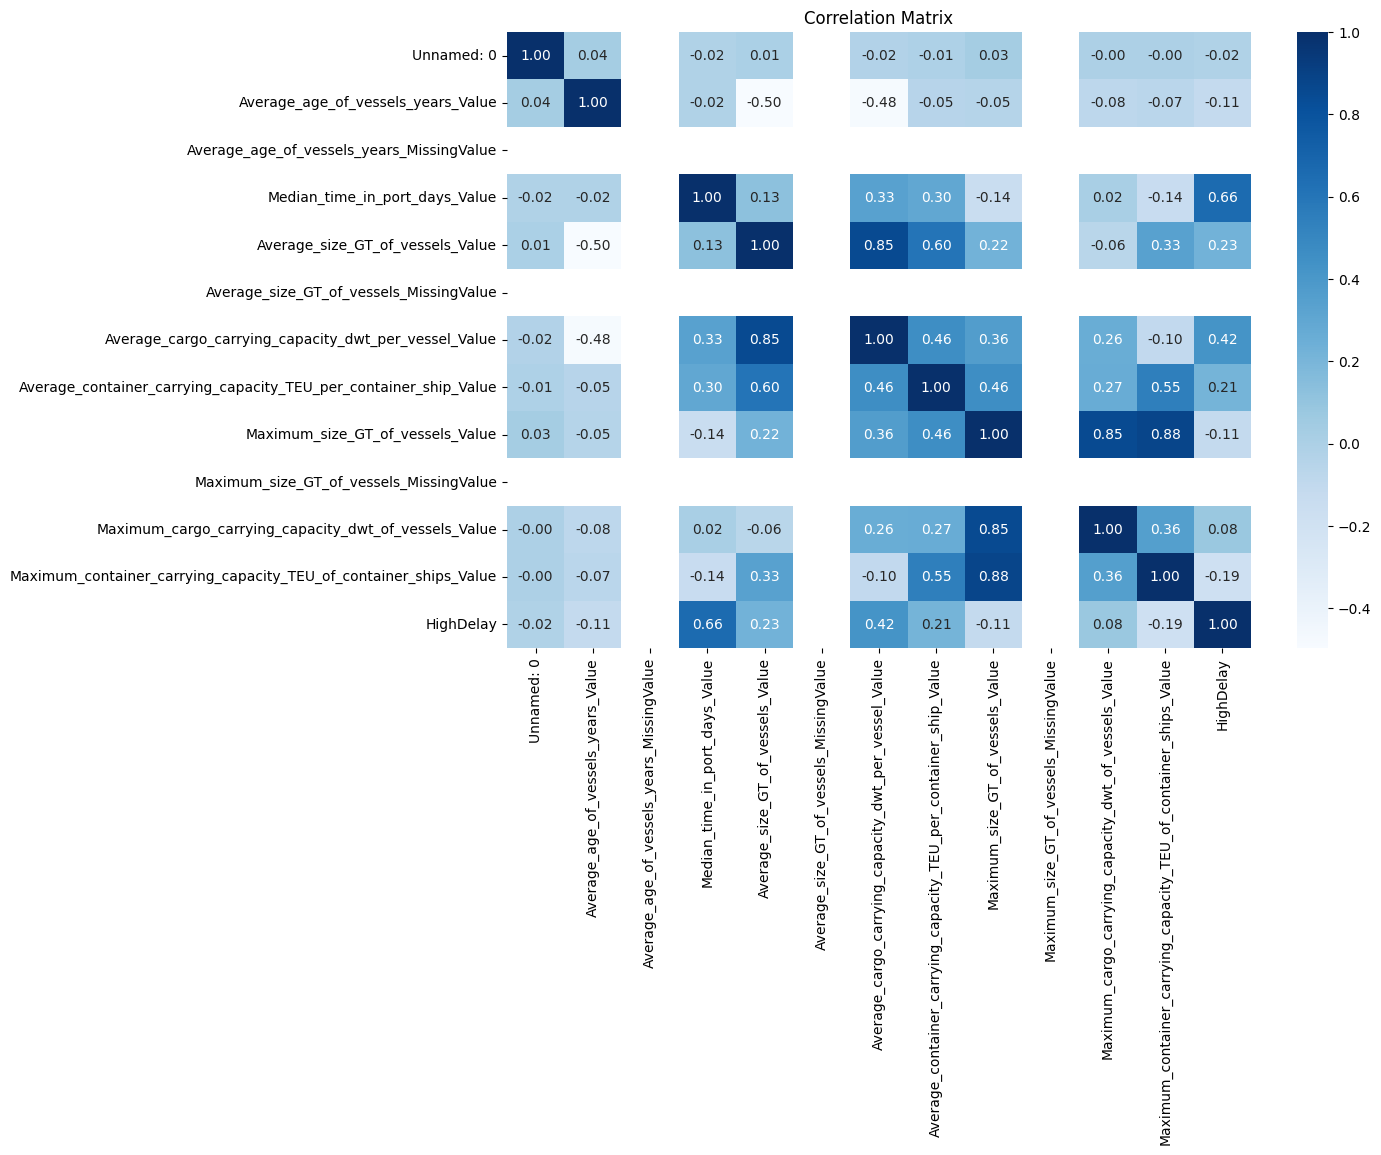

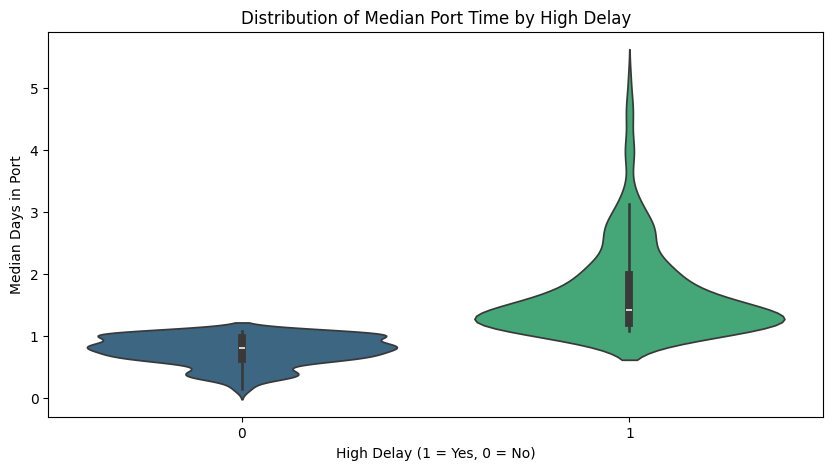

<bound method DataFrame.info of      Unnamed: 0             Economy_Label            CommercialMarket_Label  \
0             0                     World                         All ships   
1             1                     World              Liquid bulk carriers   
2             2                     World  Liquefied petroleum gas carriers   
3             3                     World    Liquefied natural gas carriers   
4             4                     World                 Dry bulk carriers   
..          ...                       ...                               ...   
798         798  United States of America                 Dry bulk carriers   
799         799  United States of America            Dry breakbulk carriers   
800         800  United States of America           Roll-on/ roll-off ships   
801         801  United States of America                   Container ships   
802         802  United States of America                   Passenger ships   

     Average_age_of

,Unnamed: 0,Average_age_of_vessels_years_Value,Average_age_of_vessels_years_MissingValue,Median_time_in_port_days_Value,Average_size_GT_of_vessels_Value,Average_size_GT_of_vessels_MissingValue,Average_cargo_carrying_capacity_dwt_per_vessel_Value,Average_container_carrying_capacity_TEU_per_container_ship_Value,Maximum_size_GT_of_vessels_Value,Maximum_size_GT_of_vessels_MissingValue,Maximum_cargo_carrying_capacity_dwt_of_vessels_Value,Maximum_container_carrying_capacity_TEU_of_container_ships_Value,HighDelay
count,803.000000,803.000000,0.0,623.000000,803.000000,0.0,619.000000,184.000000,803.000000,0.0,619.000000,184.000000,803.000000
mean,401.000000,17.100872,NaN,1.214944,25216.088418,NaN,26627.982229,3310.282609,130537.103362,NaN,162215.541195,18512.163043,0.374844
std,231.950426,5.531234,NaN,0.710418,26657.008272,NaN,24787.381233,1461.024936,66384.749862,NaN,114320.952115,6862.830933,0.484384
min,0.000000,6.000000,NaN,0.120000,1714.000000,NaN,3394.000000,777.000000,5440.000000,NaN,4999.000000,1350.000000,0.000000
25%,200.500000,13.000000,NaN,0.790000,8243.000000,NaN,8781.500000,1795.000000,74716.000000,NaN,58811.000000,15500.000000,0.000000
50%,401.000000,16.000000,NaN,1.070000,15664.000000,NaN,15530.000000,3348.000000,128975.000000,NaN,121946.000000,19630.000000,0.000000
75%,601.500000,20.000000,NaN,1.385000,30230.500000,NaN,39628.500000,4478.500000,171598.000000,NaN,298037.000000,24000.000000,1.000000
max,802.000000,36.000000,NaN,5.150000,123954.000000,NaN,112390.000000,5799.000000,237000.000000,NaN,404389.000000,24116.000000,1.000000


In [ ]:
!pip install kaggle

from google.colab import files
files.upload()

!pip install openpyxl

import pandas as pd

df = pd.read_csv("Maritime Port Performance Project Dataset.csv")

df.head()

df.columns

# Set a threshold to define 'high delay'
threshold = df["Median_time_in_port_days_Value"].median()

# Create a new binary column for high delays
df["HighDelay"] = (df["Median_time_in_port_days_Value"] > threshold).astype(int)

# Check class distribution
df["HighDelay"].value_counts()

median_delay = df["Median_time_in_port_days_Value"].median()
print(f"The median delay is {median_delay} days.")

delay_counts = df["HighDelay"].value_counts()
print(delay_counts)
print(df["HighDelay"].value_counts(normalize=True) * 100)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(data=df, x="HighDelay", palette = "pastel")
plt.title("High Delay vs Low Delay Ports")
plt.xlabel("High Delay (1 = Yes, 0 = No)")
plt.ylabel("Number of Ports")
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df["Median_time_in_port_days_Value"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Median Port Time")
plt.xlabel("Days in Port")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="CommercialMarket_Label", y="Median_time_in_port_days_Value", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Port Delay by Market Type")
plt.ylabel("Median Days in Port")
plt.xlabel("Market Type")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

plt.figure(figsize=(10,5))
sns.violinplot(data=df, x="HighDelay", y="Median_time_in_port_days_Value", hue="HighDelay", palette=sns.color_palette("viridis", 2), legend=False)
plt.title("Distribution of Median Port Time by High Delay")
plt.xlabel("High Delay (1 = Yes, 0 = No)")
plt.ylabel("Median Days in Port")
plt.show()

print(df.info)
df.describe()

Data imported using Pandas and cleaned column names for easier coding, avoiding bugs and focusing on the analysis.

The high delay column hits target helps with classification modeling later on in the codes. This line will turn regression-style data into something that can be used in classification models like logistic regression or decision trees.
  Calculated the median of the port_days_value: giving the value at which 50% of ports are faster and 50% are slower.
    The median value is 1.07, all entries with more than 1.07 days in port are flagged as [Highdelay = 1]. Others are flagged as [Higdelaye = 0].
  In this dataset 301 entries are considered high delay and 502 are not high delay.


1) *Bar Plot: Count of High vs Low Delay Ports*

- 500 Low Delay vs 300 High Delay, meaning 60% of the ports in my sample are doing okay.
- Most ports are fine but the 300 are like heavily impacting trade routes due to delays.
- Helps justify a classification approach, to identify what features push a port into the high delay category.

With rougly 38% of the port categorized as high delay, the classification approach is both relevant and actionable. The imbalance also encourages robust modeling techniques to manage class

2) *Histogram: Distribution of Median Port Time*
- As seen from the figure, the distribution is right-skewed; most ports have median times around 1 day but a few experience very long dwell times.
- Mode is around 1 day, this is the norm.

- The industry mostly operates at 1 day median but high variance in tail should not be ignored.
- The rare occurence of 4-5 day port times are probably due to policy, congestion. or weather red flag.

Despite the bulk of ports operating efficiently' the long tail reflects the vulnerabilities in global port systems. Targeted mitigation for the specific subset is crucial and required' despite the size.

3) *Box Plot: Port Delay by Market Type*

- Dry Bulk Carriers have a wide spread and highest median: could be because of slower unloading, nature of the commodity.
- LNG carriers have the lowest median port time than other vessel types.
- IQR is tight meaning there is low variability' efficient operations.
- LNG carriers often operate on tight contracts and schedules with dedicated terminals, and delays could cause major financial or safety risks (cryogenic cargo).

The dry bulk carriers pose the largest delay risk; these vessels are unpredictible in port behaviour and slow unloading patterns may warrant predictive scheduling models or infrastructure investment to minimzie bottlenecks.

4) *Correlation Matrix: Feature Relationships*

- Median Time correlates strongly with High Delay by 0.66. Justifying the logic of delays increasing port time.

The correlation matrix displays the structural links between vessel characteristics and port delay risks' notably showing that port dwell times are highly associated with cargo capacity rather than vessel age or max theoretical size.

5) * Violin Plot: Median Port Time by High Delay *

- X-axis: Binary classification: 0 = Low Delay, 1 = High Delay
- Y-axis: Median number of days ships spend in port

- It shows the distribution of the High Delay is wider and shows a higher median meaning ports with high delays experience longer stays.

The presence of right skewness in the high delay group highlights operational inefficiencies and outliers that should be prioritized in capacity planning or policy reforms.

Saving Maritime Port Performance Project Dataset.csv to Maritime Port Performance Project Dataset.csv


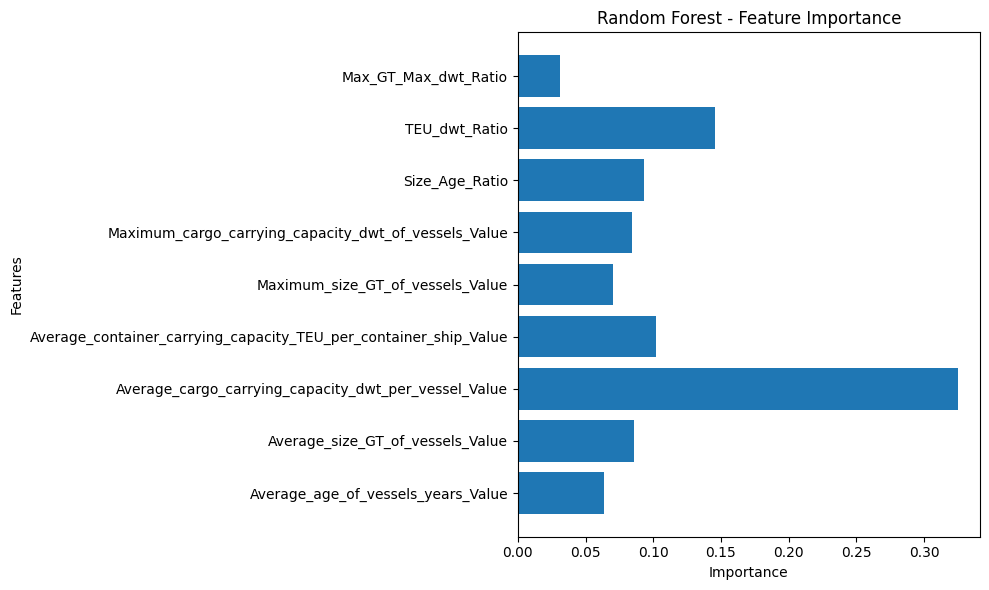

Random Forest Average Accuracy (CV): 0.9567251461988304
Logistic Regression Accuracy: 0.6842105263157895
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.78      0.70         9
           1       0.75      0.60      0.67        10

    accuracy                           0.68        19
   macro avg       0.69      0.69      0.68        19
weighted avg       0.70      0.68      0.68        19

Logistic Regression Confusion Matrix:
 [[7 2]
 [4 6]]
Logistic Regression Average Accuracy (CV): 0.7935672514619883


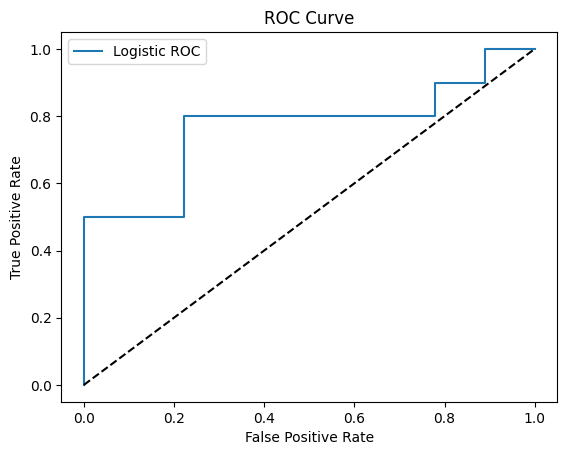

Logistic Regression Precision: 0.750000
Logistic Regression Recall: 0.600000


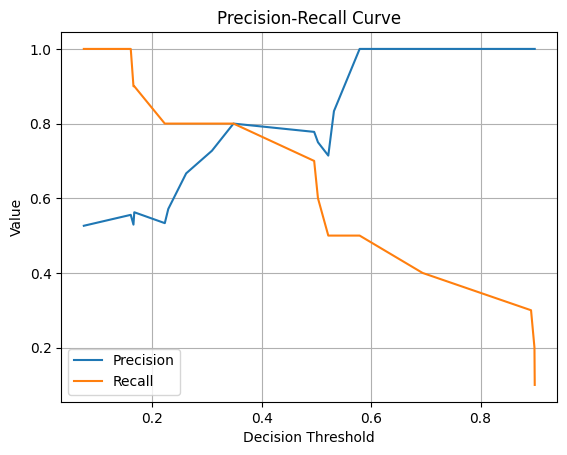

Custom Threshold Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.78      0.70      0.74        10

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19

Custom Threshold Confusion Matrix:
 [[7 2]
 [3 7]]
Confusion Matrix:

[[7 2]
 [3 7]]


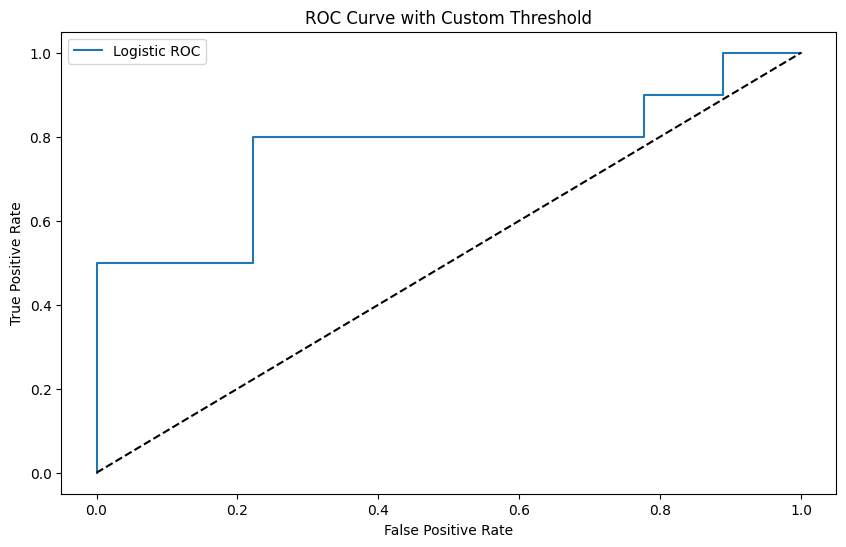

Accuracy: 0.7368421052631579
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.78      0.70      0.74        10

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19

Confusion Matrix:
 [[7 2]
 [3 7]]


In [2]:
!pip install kaggle

from google.colab import files
files.upload()

!pip install openpyxl

import pandas as pd

df = pd.read_csv("Maritime Port Performance Project Dataset.csv")

df.head()

df.columns = df.columns.str.strip().str.replace(" ", "_")

threshold = df["Median_time_in_port_days_Value"].median()

df["HighDelay"] = (df["Median_time_in_port_days_Value"] > threshold).astype(int)

median_delay = df["Median_time_in_port_days_Value"].median()


# 📊 Feature selection
initial_features = [
    "Average_age_of_vessels_years_Value",
    "Average_size_GT_of_vessels_Value",
    "Average_cargo_carrying_capacity_dwt_per_vessel_Value",
    "Average_container_carrying_capacity_TEU_per_container_ship_Value",
    "Maximum_size_GT_of_vessels_Value",
    "Maximum_cargo_carrying_capacity_dwt_of_vessels_Value", # Corrected typo here
]

# 🧼 Drop rows with missing values in initial features and target
model_df = df[initial_features + ["HighDelay"]].dropna()

# 🔧 Create new ratio features *after* dropping NaNs
model_df["Size_Age_Ratio"] = model_df["Average_size_GT_of_vessels_Value"] / (model_df["Average_age_of_vessels_years_Value"] + 1)
model_df["TEU_dwt_Ratio"] = model_df["Average_container_carrying_capacity_TEU_per_container_ship_Value"] / (model_df["Average_cargo_carrying_capacity_dwt_per_vessel_Value"] + 1)
model_df["Max_GT_Max_dwt_Ratio"] = model_df["Maximum_size_GT_of_vessels_Value"] / (model_df["Maximum_cargo_carrying_capacity_dwt_of_vessels_Value"] + 1)


features = initial_features + ["Size_Age_Ratio", "TEU_dwt_Ratio", "Max_GT_Max_dwt_Ratio"]


x = model_df[features]
y = model_df["HighDelay"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
x_poly = poly.fit_transform(x_scaled)

x_train_poly, x_test_poly, y_train, y_test = train_test_split(x_poly, y, test_size=0.2, random_state=42)

model_poly = LogisticRegression(class_weight="balanced", solver = "liblinear", max_iter=1000)
model_poly.fit(x_train_poly, y_train)

y_pred_poly = model_poly.predict(x_test_poly)

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)


import matplotlib.pyplot as plt

importances_rf = model_rf.feature_importances_
feat_names = x.columns

plt.figure(figsize=(10,6))
plt.barh(feat_names, importances_rf)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Random Forest - Feature Importance")
plt.tight_layout()
plt.show()

from sklearn.model_selection import cross_val_score

scores_rf = cross_val_score(model_rf, x_scaled, y, cv=5)
print("Random Forest Average Accuracy (CV):", scores_rf.mean())


# Logistic Regression
model_log = LogisticRegression(max_iter=1000)
model_log.fit(x_train, y_train)

y_pred_log = model_log.predict(x_test)

accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log}")

print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_log))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

scores_log = cross_val_score(model_log, x_scaled, y, cv=5)
print("Logistic Regression Average Accuracy (CV):", scores_log.mean())

from sklearn.metrics import precision_recall_curve

probs = model_log.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

#ROC Curve for threshold flexibility
from sklearn.metrics import roc_curve, roc_auc_score
y_probs = model_log.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.plot(fpr, tpr, label="Logistic ROC")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

from sklearn.metrics import precision_score, recall_score

precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)

print(f"Logistic Regression Precision: {precision:2f}")
print(f"Logistic Regression Recall: {recall:2f}")

from sklearn.metrics import precision_recall_curve

probs = model_log.predict_proba(x_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

plt.plot(thresholds, precision[:-1], label="Precision")
plt.plot(thresholds, recall[:-1], label="Recall")
plt.xlabel("Decision Threshold")
plt.ylabel("Value")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()

y_probs = model_log.predict_proba(x_test)[:,1]
custom_threshold = 0.38
y_pred_custom = (y_probs >= custom_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Custom Threshold Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Custom Threshold Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_custom))

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label="Logistic ROC")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Custom Threshold")
plt.legend()
plt.show()

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_custom))

According to the ROC Curve graph:
- The diagonal line represents random guessing with no model.
- Above the that line shows the model is performing better than random guessing.

Y-axis: How many actual positives the model caught HIGHER BETTER
X-axis: How many negatives gor wrongly called positive LOWER BETTER.

Maximum vertical distance from the diagonal is the most "informed" threshold.

  Youden's statistic
      J = TPR - FPR,
       highest J = best threshold maximizing both sensitivity and specificity.

To get a *higher recall*, I will move down the threshold so the model casts a wider net.




Saving Maritime Port Performance Project Dataset.csv to Maritime Port Performance Project Dataset (8).csv
Economy_Label
United States of America    0.750000
Russian Federation          0.750000
Australia                   0.666667
Turkiye                     0.666667
Italy                       0.666667
Indonesia                   0.638889
France                      0.583333
Croatia                     0.571429
United Kingdom              0.527778
China                       0.500000
Name: HighDelay, dtype: float64


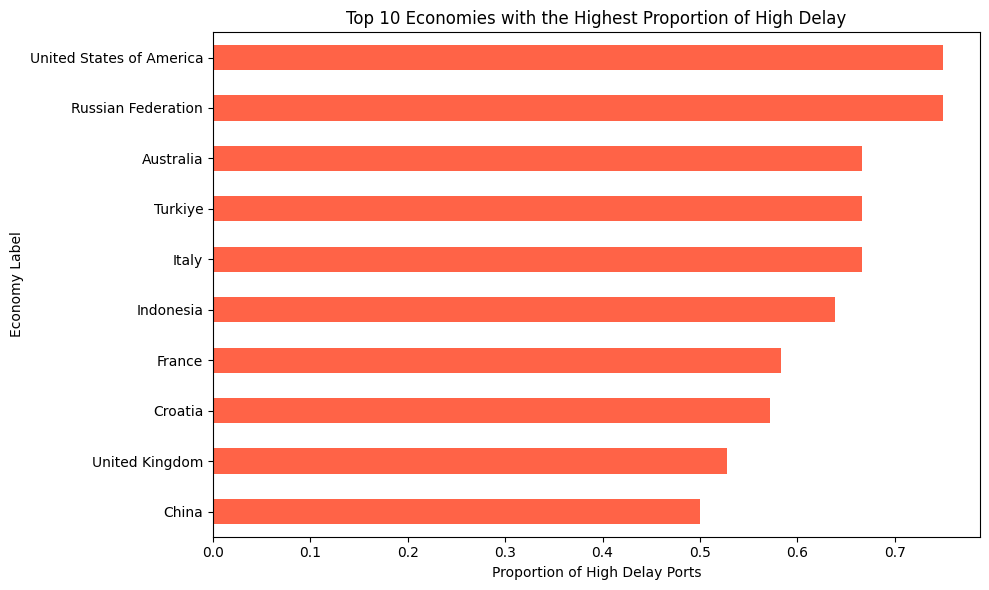

                                  Average_age_of_vessels_years_Value  \
CommercialMarket_Label                                                 
Liquefied natural gas carriers                             10.773333   
Dry bulk carriers                                          16.163043   
Liquid bulk carriers                                       15.086957   
All ships                                                  19.641304   
Liquefied petroleum gas carriers                           14.420455   
Roll-on/ roll-off ships                                    19.306818   
Dry breakbulk carriers                                     20.847826   
Container ships                                            15.793478   
Passenger ships                                            20.684783   

                                  Average_size_GT_of_vessels_Value  \
CommercialMarket_Label                                               
Liquefied natural gas carriers                        89762.986667 

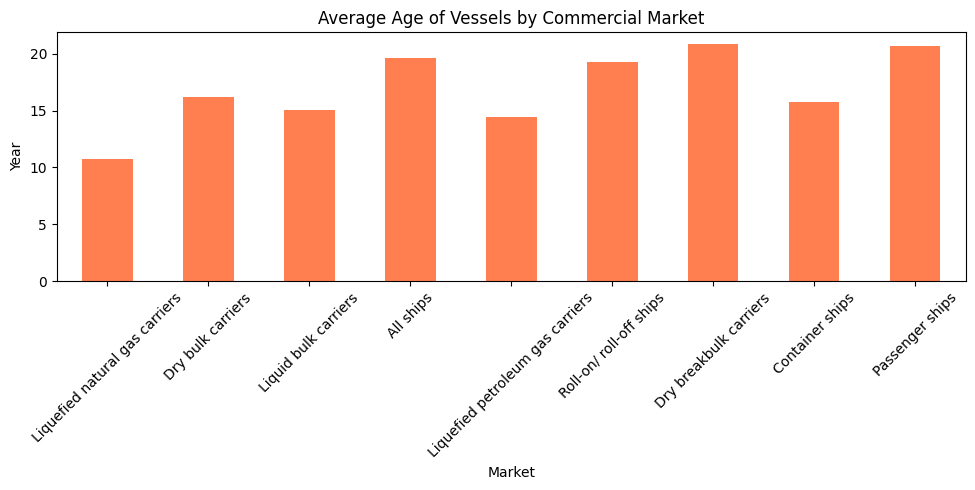

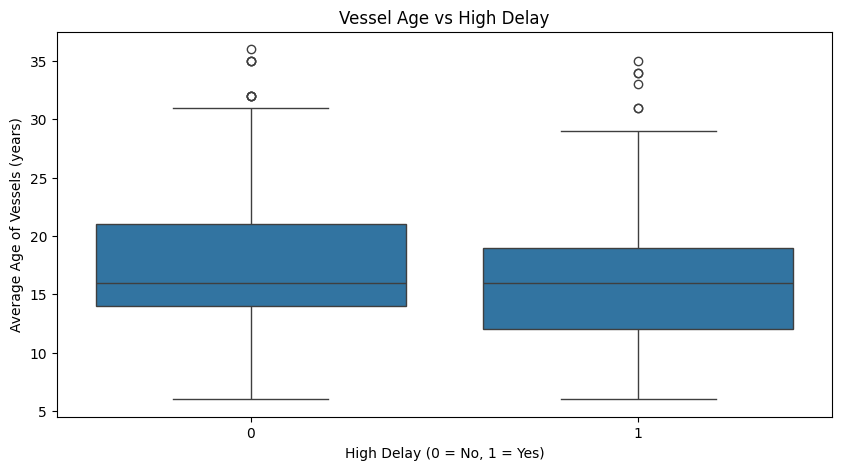

In [11]:
!pip install kaggle

from google.colab import files
files.upload()

!pip install openpyxl

import pandas as pd

df = pd.read_csv("Maritime Port Performance Project Dataset.csv")

df.head()

threshold = df["Median_time_in_port_days_Value"].median()
df["HighDelay"] = (df["Median_time_in_port_days_Value"] > threshold).astype(int)

top_economies = df.groupby("Economy_Label")["HighDelay"].mean().sort_values(ascending=False).head(10)
print(top_economies)

top_economies.plot(kind="barh", figsize=(10,6), color="tomato")
plt.xlabel("Proportion of High Delay Ports")
plt.ylabel("Economy Label")
plt.title("Top 10 Economies with the Highest Proportion of High Delay")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

grouped_market = df.groupby("CommercialMarket_Label")[[
    "Average_age_of_vessels_years_Value",
    "Average_size_GT_of_vessels_Value",
    "Average_cargo_carrying_capacity_dwt_per_vessel_Value"
]].mean().sort_values(by="Average_cargo_carrying_capacity_dwt_per_vessel_Value", ascending=False)

print(grouped_market)

plt.figure(figsize=(10,5))
grouped_market["Average_age_of_vessels_years_Value"].plot(kind="bar",color="coral")
plt.xlabel("Market")
plt.ylabel("Year")
plt.title("Average Age of Vessels by Commercial Market")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x="HighDelay", y="Average_age_of_vessels_years_Value", data=df)
plt.title("Vessel Age vs High Delay")
plt.xlabel("High Delay (0 = No, 1 = Yes)")
plt.ylabel("Average Age of Vessels (years)")
plt.show()